In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [5]:
!pip install pandas_datareader

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
start ='2010-01-01'
end ='2019-12-31'
df = data.DataReader("AAPL","yahoo",start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [7]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [8]:
df=df.drop(['Date','Adj Close'],axis =1 )
df.head()


,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


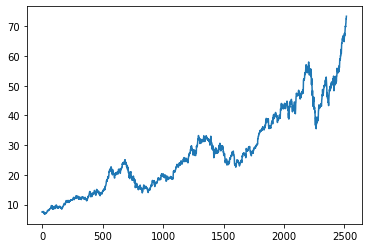

In [9]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

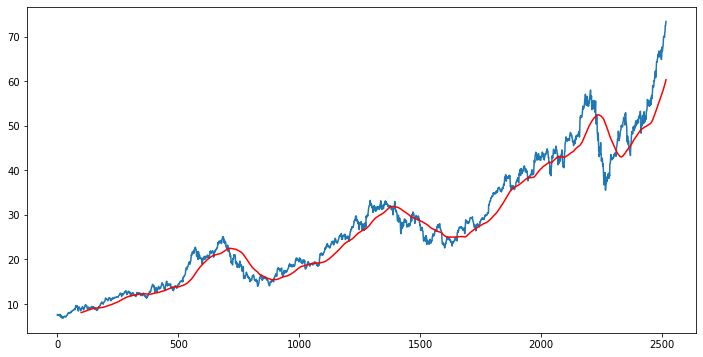

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")

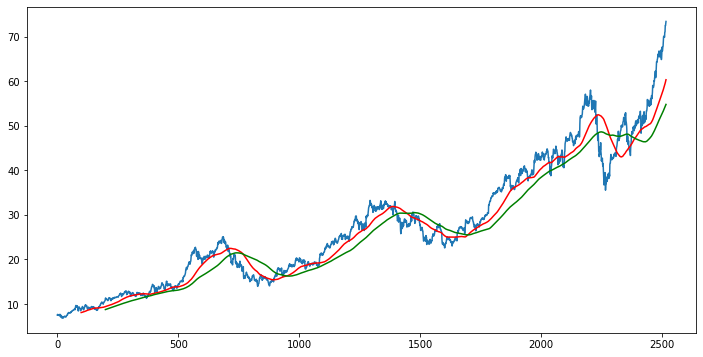

In [12]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"g")

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [15]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train

[array([[2.52790771e-02],
        [2.97178191e-02],
        [3.02185410e-02],
        [2.56038878e-02],
        [2.50760817e-02],
        [2.69706691e-02],
        [2.44400837e-02],
        [2.12057268e-02],
        [2.51708129e-02],
        [2.35198380e-02],
        [1.87833875e-02],
        [3.11116846e-02],
        [2.66323796e-02],
        [2.16793646e-02],
        [7.71362572e-03],
        [1.49130326e-02],
        [1.87969205e-02],
        [2.14222733e-02],
        [9.79765742e-03],
        [1.35149573e-05],
        [3.62674239e-03],
        [5.15593812e-03],
        [9.71645927e-03],
        [0.00000000e+00],
        [4.61461711e-03],
        [2.80124591e-03],
        [5.60252796e-03],
        [4.15451231e-03],
        [8.95862792e-03],
        [1.12727391e-02],
        [1.53596224e-02],
        [1.42093514e-02],
        [1.47235702e-02],
        [1.30184452e-02],
        [1.13268532e-02],
        [6.77986503e-03],
        [1.16516638e-02],
        [1.34650350e-02],
        [1.7

In [16]:
x_train , y_train =np.array(x_train),np.array(y_train)

In [17]:
!pip install keras

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [19]:
!pip install tensorflow

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
model = Sequential()
model.add(LSTM(units=50,activation ='relu', return_sequences =True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation ='relu', return_sequences =True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation ='relu', return_sequences =True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

          

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer="adam" ,loss ="mean_squared_error")
model.fit(x_train,y_train,epochs= 50)

Epoch 1/50
52/52 [==============================] - 24s 301ms/step - loss: 0.0752
Epoch 2/50
52/52 [==============================] - 15s 288ms/step - loss: 0.0130
Epoch 3/50
52/52 [==============================] - 16s 298ms/step - loss: 0.0111
Epoch 4/50
52/52 [==============================] - 15s 283ms/step - loss: 0.0097
Epoch 5/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0098
Epoch 6/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0082
Epoch 7/50
52/52 [==============================] - 17s 322ms/step - loss: 0.0088
Epoch 8/50
52/52 [==============================] - 17s 332ms/step - loss: 0.0074
Epoch 9/50
52/52 [==============================] - 17s 321ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 17s 317ms/step - loss: 0.0073
Epoch 11/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0074
Epoch 12/50
50/52 [===========================>..] - ETA: 0s - loss: 0.0065

model.save("keras_model.h5")

In [ ]:
model.save("keras_model.h5")

In [ ]:
data_training.tail(100)

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing , ignore_index = True)
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_predicted =model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
scaler.scale_

In [ ]:
scale_factor =1/0.2099517
y_predicted=y_predicted*scale_factor
y_test = y_test*scale_factor

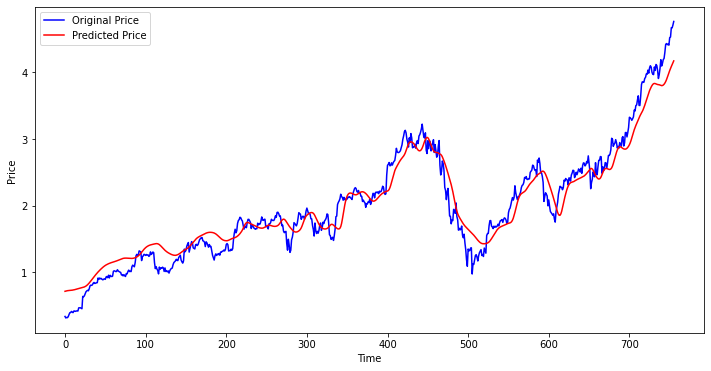

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"b",label ="Original Price")
plt.plot(y_predicted,"r",label ="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()